In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get data
pd.read_csv('./Participants_dataset/sample_submission.csv')

,postcode,Accident_risk_index
0,AB10 1AU,0
1,AB10 1PG,0
2,AB10 1TT,0
3,AB10 1YP,0
4,AB10 6LQ,0
...,...,...
49767,ZE2 9LZ,0
49768,ZE2 9RE,0
49769,ZE2 9RJ,0
49770,ZE2 9SB,0


In [7]:
pop_df = pd.read_csv('./Participants_dataset/population.csv')
pop_df.sample(2)

,postcode,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
5610,S81 9,Total,7928,3835,4093,7887,41,55,2361.11,3.4
2056,E8 2,Total,10061,5132,4929,9986,75,80,61.38,163.9


In [5]:
roads_df = pd.read_csv('./Participants_dataset/roads_network.csv')
roads_df.sample(2)

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
2637,POINT (-1.67934 52.565876),A Road,A Road,Single Carriageway,358.0,0.0,0.053077,B78 2LG
15533,POINT (-0.159217 51.406783),A Road,A Road,Single Carriageway,10.0,1.0,0.033640,CR4 4AX


In [6]:
train_df = pd.read_csv('./Participants_dataset/train.csv')
train_df.sample(2)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
321363,402689,15,2,1,13/09/12,6,10:45,93,E10000020,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,RH13 0QL,United Kingdom
440885,552606,46,1,1,14/02/12,2,18:23,733,S12000034,4,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,PL6 7BQ,United Kingdom


In [17]:
print('pop: ',len(set(pop_df.postcode)),'', 'roads: ', len(set(roads_df.postcode)),'', 'train: ', len(set(train_df.postcode)))

pop:  8035  roads:  75895  train:  95625


In [13]:
roads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91566 entries, 0 to 91565
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   WKT                                  91566 non-null  object 
 1   roadClassi                           90352 non-null  object 
 2   roadFuncti                           90352 non-null  object 
 3   formOfWay                            90352 non-null  object 
 4   length                               90352 non-null  float64
 5   primaryRou                           90352 non-null  float64
 6   distance to the nearest point on rd  90409 non-null  float64
 7   postcode                             91566 non-null  object 
dtypes: float64(3), object(5)
memory usage: 5.6+ MB


In [49]:
roads_numeric_features = roads_df.select_dtypes([np.number]).columns
roads_categorical_features = roads_df.select_dtypes(exclude=[np.number]).drop(['WKT','postcode'],axis=1).columns
# overwrite roads df for mem
roads_df = pd.concat([pd.get_dummies(roads_df[roads_categorical_features]),roads_df.drop(roads_categorical_features,axis=1)],axis=1)

In [60]:
top_val=roads_df['postcode'].value_counts().head(1).index[0]
roads_df[roads_df['postcode']==top_val]

,roadClassi_A Road,roadClassi_Motorway,roadFuncti_A Road,roadFuncti_Motorway,formOfWay_Collapsed Dual Carriageway,formOfWay_Dual Carriageway,formOfWay_Roundabout,formOfWay_Single Carriageway,formOfWay_Slip Road,WKT,length,primaryRou,distance to the nearest point on rd,postcode
20355,1,0,1,0,1,0,0,0,0,POINT (-1.471589 54.720232),213.0,1.0,0.069927,DH6 4LX
20356,1,0,1,0,0,0,0,1,0,POINT (-1.471589 54.720232),7.0,0.0,0.069927,DH6 4LX
20357,1,0,1,0,1,0,0,0,0,POINT (-1.471589 54.720232),119.0,1.0,0.069927,DH6 4LX


In [62]:
roads_df[roads_df['postcode']==top_val].drop('WKT',axis=1).groupby('postcode').agg(sum)
roads_df[roads_df['postcode']==top_val].drop('WKT',axis=1).groupby('postcode').agg(np.nanmean)

,roadClassi_A Road,roadClassi_Motorway,roadFuncti_A Road,roadFuncti_Motorway,formOfWay_Collapsed Dual Carriageway,formOfWay_Dual Carriageway,formOfWay_Roundabout,formOfWay_Single Carriageway,formOfWay_Slip Road,length,primaryRou,distance to the nearest point on rd
postcode,,,,,,,,,,,,
DH6 4LX,1.0,0.0,1.0,0.0,0.666667,0.0,0.0,0.333333,0.0,113.0,0.666667,0.069927


In [172]:
roads_features_df = pd.concat([roads_df.drop('WKT',axis=1).groupby('postcode').agg(sum),roads_df.drop('WKT',axis=1).groupby('postcode').agg(np.nanmean)],axis=1)

In [173]:
len(roads_features_df.columns),len(set(roads_features_df.columns))
roads_features_df.columns = [x+'_sum' if i >= 12 else x+'_mean' for i,x in enumerate(roads_features_df.columns)]

In [73]:
pop_df = pop_df.drop(['Rural Urban'],axis=1)

<AxesSubplot:ylabel='postcode'>

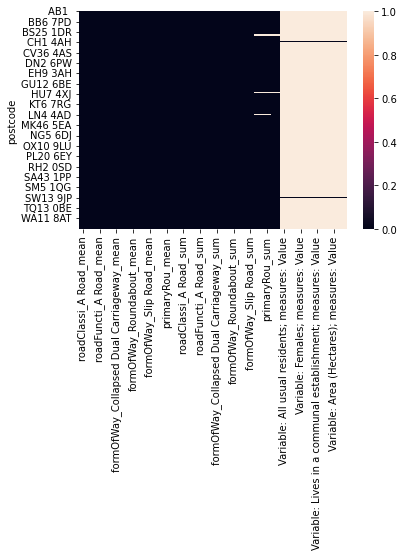

In [80]:
sns.heatmap(roads_features_df.join(pop_df.set_index('postcode'),how='left').isnull())

In [100]:
len(set(train_df.postcode).intersection(set(pop_df.postcode))),len(set(train_df.postcode).intersection(roads_features_df.index))

(64, 5727)

In [103]:
train_df = train_df.drop('country',axis=1)

In [106]:
train_df.state.unique()

array(['England', 'Alba / Scotland', 'Cymru / Wales'], dtype=object)

In [113]:
len(set(roads_df.postcode.apply(lambda row_str: row_str[:2]))),len(set(train_df.postcode.apply(lambda row_str: row_str[:2]))) 

(224, 183)

Can for first run match on post town if not full join 

In [125]:
# matching on post town
len(set(train_df.postcode.apply(lambda row_str: row_str.split(' ')[0])) \
    .intersection(roads_df.postcode.apply(lambda row_str: row_str.split(' ')[0])))

2669

In [128]:
#roads_features_df['postcode'] = pd.Series(roads_features_df.index)
##roads_features_df.index = pd.Series(roads_features_df.index).apply(lambda row_str: row_str.split(' ')[0]) # post town index
#train_df['post_town'] = train_df.postcode.apply(lambda row_str: row_str.split(' ')[0])

In [175]:
train_roads_df = train_df.set_index('postcode').join(roads_features_df, how= 'left')

<AxesSubplot:ylabel='postcode'>

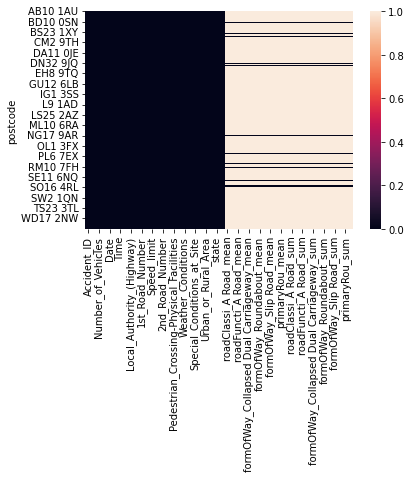

In [177]:
sns.heatmap(train_roads_df.isnull())

In [228]:
print((~train_roads_df.roadClassi_Motorway_mean.isnull()).sum())
inds_where_null = np.where(train_roads_df.roadFuncti_Motorway_sum.isnull())
inds_where_not_null = np.where(train_roads_df.roadFuncti_Motorway_sum.notnull())
# inds where null fill with post town

28752


In [232]:
inds_where_not_null

(array([    85,     86,    292, ..., 478707, 478708, 478709], dtype=int64),)

In [204]:
pd.Series(roads_features_df.index).str.upper().apply(lambda row_str: row_str.split(' ')[0]).value_counts().head()

YO31    189
S5      188
NW1     153
CB1     148
BN1     147
       ... 
N32       1
N44Q      1
N64       1
N65D      1
LL9       1
Name: postcode, Length: 3135, dtype: int64

In [206]:
roads_features_df['post_town'] = list(pd.Series(roads_features_df.index).str.upper().apply(lambda row_str: row_str.split(' ')[0]))

In [210]:
roads_town_df = roads_features_df.groupby('post_town').agg(np.nanmean)

In [264]:
post_code_level_df = train_df.iloc[inds_where_null].set_index('post_town').join(roads_town_df, how='left')
post_town_level_df = train_roads_df.iloc[inds_where_not_null]
train_enriched_df = pd.concat([post_code_level_df, post_town_level_df],axis=0)

<AxesSubplot:>

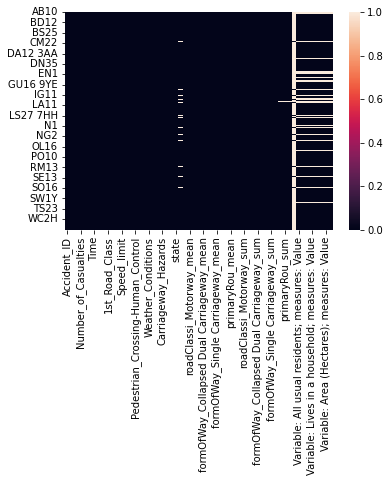

In [253]:
pop_df['post_town'] = pop_df.postcode.apply(lambda row_str: row_str.split(' ')[0])  
sns.heatmap(train_enriched_df.join(pop_df.groupby('post_town').agg(np.nanmean),how='left').isnull())


In [265]:
train_enriched_df = train_enriched_df.join(pop_df.groupby('post_town').agg(np.nanmean),how='left')

In [267]:
train_enriched_df.isnull().sum()

Accident_ID                                                                                                       0
Police_Force                                                                                                      0
Number_of_Vehicles                                                                                                0
Number_of_Casualties                                                                                              0
Date                                                                                                              0
Day_of_Week                                                                                                       0
Time                                                                                                             15
Local_Authority_(District)                                                                                        0
Local_Authority_(Highway)                                               

In [266]:
train_enriched_df = train_enriched_df.drop(['post_town', 'postcode'],axis=1)

<AxesSubplot:>

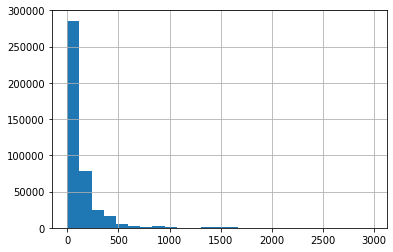

In [263]:
train_enriched_df.iloc[:,-4].hist(bins=25)

In [270]:
mean_fill = train_enriched_df.iloc[:,-8:].columns
mode_fill = train_enriched_df.iloc[:,:-8].columns
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy='most_frequent')
train_enriched_df[mode_fill] = mode_imputer.fit_transform(train_enriched_df[mode_fill])
mean_imputer = SimpleImputer(strategy='mean')
train_enriched_df[mean_fill] = mean_imputer.fit_transform(train_enriched_df[mean_fill])

In [285]:
train_enriched_df['month_of_year'] = pd.to_datetime(train_enriched_df.Date).dt.month
train_enriched_df['day_of_month'] = pd.to_datetime(train_enriched_df.Date).dt.day
train_enriched_df = train_enriched_df.drop(['Date'],axis=1)

In [283]:
train_enriched_df['Time'] = train_enriched_df.Time.apply(lambda row: row.replace(':',''))

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,...,roadFuncti_A Road_sum,roadFuncti_Motorway_sum,formOfWay_Collapsed Dual Carriageway_sum,formOfWay_Dual Carriageway_sum,formOfWay_Roundabout_sum,formOfWay_Single Carriageway_sum,formOfWay_Slip Road_sum,length_sum,primaryRou_sum,distance to the nearest point on rd_sum
AB10,1958,42,2,1,6,2000,681,E10000016,3,3353,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2643.0,1.0,1.812432
AB10,9041,35,2,2,5,1351,502,E10000008,5,442,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2643.0,1.0,1.812432
AB10,9193,33,2,1,6,1505,301,S12000036,6,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2643.0,1.0,1.812432
AB10,10729,42,3,1,3,1625,661,E09000021,1,11,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2643.0,1.0,1.812432
AB10,11230,44,1,1,7,1010,646,E08000035,3,24,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2643.0,1.0,1.812432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZE2 9JJ,201518,42,2,1,7,1900,6,E09000015,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2643.0,1.0,0.008629
ZE2 9JJ,300772,22,2,1,5,1100,303,E09000028,4,6348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2643.0,1.0,0.008629
ZE2 9JJ,332345,5,2,1,2,1230,79,E09000033,3,429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2643.0,1.0,0.008629
ZE2 9JJ,491159,46,2,1,5,1726,503,E06000052,3,3143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2643.0,1.0,0.008629


In [359]:
cat_cols = []
num_cols = list(train_enriched_df.select_dtypes([np.number]).columns)
for col in train_enriched_df.select_dtypes(exclude=[np.number]).columns:
    if (~train_enriched_df[col].astype(str).apply(lambda row: row.replace('.','').replace('-','').isdigit())).sum() != 0:
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [360]:
[num_cols.append(x) for x in cat_cols[-2:]]
cat_cols.pop(-1)
cat_cols.pop(-1)
 

'distance to the nearest point on rd_mean'

In [367]:
# target
grouped = train_enriched_df.groupby('Accident_ID')

Accident_Risk_Index = grouped.Number_of_Casualties.transform(lambda x: (x) / len(x))


In [373]:
pd.concat([Accident_Risk_Index,train_enriched_df.Accident_ID,train_enriched_df.Number_of_Casualties],axis=1)[train_enriched_df.Accident_ID==22009 ]

,Number_of_Casualties,Accident_ID,Number_of_Casualties
E13,0.5,22009,1
E13 0SG,0.5,22009,1


array([ 0.        ,  0.69314718,  0.        , ..., -0.69314718,
       -0.69314718, -0.69314718])

## Find best encoding method

In [386]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import category_encoders as ce
import time
import warnings
warnings.filterwarnings('ignore')

numeric_features = num_cols

categorical_features = cat_cols

X = train_enriched_df
y = Accident_Risk_Index

#y = preprocessing.LabelEncoder().fit_transform(y)
y = np.log(list(y.values))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

selected_model = XGBRegressor(tree_method = "gpu_hist",single_precision_histogram=True, gpu_id=0)

encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    #'HashingEncoder': ce.hashing.HashingEncoder, takes too long
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder,
    # 'WOEEncoder': ce.woe.WOEEncoder target must be binary
}

train_enriched_df_results = pd.DataFrame(columns=['encoder', 'rmse', 'r2'])


for key in encoders:
    
    time_0 = time.time()
    categorical_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', encoders[key]())
        ]
    )    

    numeric_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ('numerical', numeric_transformer, numeric_features),
            ('categorical', categorical_transformer, categorical_features)
        ]
    )

    pipe = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('regressor', selected_model)
        ]
    )

    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    row = {
        'encoder': key,
        'rmse': np.sqrt(mse(y_test, y_pred)),
        'r2': r2_score(y_test, y_pred),
    }

    train_enriched_df_results = train_enriched_df_results.append(row, ignore_index=True)
    print(key, 'time taken:', time.time()-time_0)
    print()

BackwardDifferenceEncoder time taken: 29.035754442214966

BaseNEncoder time taken: 10.153574228286743

BinaryEncoder time taken: 10.581998825073242

CatBoostEncoder time taken: 10.947134494781494

HelmertEncoder time taken: 23.011427879333496

JamesSteinEncoder time taken: 9.653735399246216

OneHotEncoder time taken: 22.816307306289673

LeaveOneOutEncoder time taken: 10.968998908996582

MEstimateEncoder time taken: 9.931001424789429

OrdinalEncoder time taken: 8.875207662582397

PolynomialEncoder time taken: 18.566075086593628

SumEncoder time taken: 21.59127712249756

TargetEncoder time taken: 9.509670734405518



In [387]:
train_enriched_df_results

,encoder,rmse,r2
0,BackwardDifferenceEncoder,0.166957,0.880514
1,BaseNEncoder,0.167286,0.880044
2,BinaryEncoder,0.167286,0.880044
3,CatBoostEncoder,0.167601,0.879591
4,HelmertEncoder,0.167615,0.879571
5,JamesSteinEncoder,0.167881,0.879189
6,OneHotEncoder,0.167701,0.879447
7,LeaveOneOutEncoder,0.422639,0.234325
8,MEstimateEncoder,0.167541,0.879677
9,OrdinalEncoder,0.167762,0.879360


In [391]:
train_enriched_df_results.iloc[0]['rmse']
0.1669574934318237*2

0.3339149868636474

In [ ]:
train_enriched_df_results.sort_values()

In [396]:
res_arr=\
['BackwardDifferenceEncoder',0.166957,0.880514],\
['BaseNEncoder',0.167286,0.880044],\
['BinaryEncoder',0.167286,0.880044],\
['CatBoostEncoder',0.167601,0.879591],\
['HelmertEncoder',0.167615,0.879571],\
['JamesSteinEncoder',0.167881,0.879189],\
['OneHotEncoder',0.167701,0.879447],\
['LeaveOneOutEncoder',0.422639,0.234325],\
['MEstimateEncoder',0.167541,0.879677],\
['OrdinalEncoder',0.167762,0.879360],\
['PolynomialEncoder',0.166961,0.880510],\
['SumEncoder',0.167618,0.879567],\
['TargetEncoder',0.167174,0.880204]
pd.DataFrame(res_arr).sort_values(1)

,0,1,2
0,BackwardDifferenceEncoder,0.166957,0.880514
10,PolynomialEncoder,0.166961,0.880510
12,TargetEncoder,0.167174,0.880204
1,BaseNEncoder,0.167286,0.880044
2,BinaryEncoder,0.167286,0.880044
8,MEstimateEncoder,0.167541,0.879677
3,CatBoostEncoder,0.167601,0.879591
4,HelmertEncoder,0.167615,0.879571
11,SumEncoder,0.167618,0.879567
6,OneHotEncoder,0.167701,0.879447


In [397]:
pd.DataFrame(res_arr).sort_values(2)

,0,1,2
7,LeaveOneOutEncoder,0.422639,0.234325
5,JamesSteinEncoder,0.167881,0.879189
9,OrdinalEncoder,0.167762,0.879360
6,OneHotEncoder,0.167701,0.879447
11,SumEncoder,0.167618,0.879567
4,HelmertEncoder,0.167615,0.879571
3,CatBoostEncoder,0.167601,0.879591
8,MEstimateEncoder,0.167541,0.879677
1,BaseNEncoder,0.167286,0.880044
2,BinaryEncoder,0.167286,0.880044
